In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [157]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')

data = pd.merge(pd.merge(ratings, users), movies)

In [158]:
#1. An aggregate of the movie ratings for each particular genre.
mean_ratings = data.pivot_table('rating', index='genres', aggfunc='mean')
mean_ratings

genres
Action                                           3.354886
Action|Adventure                                 3.676814
Action|Adventure|Animation                       4.147826
Action|Adventure|Animation|Children's|Fantasy    2.703704
Action|Adventure|Animation|Horror|Sci-Fi         3.546926
Action|Adventure|Children's                      1.318182
Action|Adventure|Children's|Comedy               2.306950
Action|Adventure|Children's|Fantasy              2.090909
Action|Adventure|Children's|Sci-Fi               1.874286
Action|Adventure|Comedy                          3.095330
Action|Adventure|Comedy|Crime                    3.137194
Action|Adventure|Comedy|Horror                   3.826642
Action|Adventure|Comedy|Horror|Sci-Fi            3.804233
Action|Adventure|Comedy|Romance                  3.862448
Action|Adventure|Comedy|Sci-Fi                   3.739953
Action|Adventure|Comedy|War                      2.276995
Action|Adventure|Crime                           2.925349
Action|

In [159]:
#2. The top 5 highest ranked genre by women.
mean_ratings2 = data.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')
top_female_ratings = mean_ratings2['F'].sort_values(ascending=False)[:5]
top_female_ratings

genres
Animation|Comedy|Thriller             4.550802
Animation                             4.533333
Film-Noir|Romance|Thriller            4.448718
Sci-Fi|War                            4.376623
Adventure|Children's|Drama|Musical    4.355030
Name: F, dtype: float64

In [160]:
#3. The top 5 highest ranked genre by men.
top_male_ratings = mean_ratings2['M'].sort_values(ascending=False)[:5]
top_male_ratings

genres
Sci-Fi|War                   4.464789
Animation|Comedy|Thriller    4.445110
Film-Noir|Mystery            4.381536
Adventure|War                4.376633
Animation                    4.353107
Name: M, dtype: float64

In [161]:
#4. A breakdown of a movie’s ratings by age, use any movie of your choice.
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['age_group'] = pd.cut(data.age, range(0, 81, 10), right=False, labels=labels)
data[['age', 'age_group']].drop_duplicates()[:10]

rating_age = data.pivot_table('rating', index='title', columns='age_group', aggfunc='mean')
God_Father_Rating_Age = rating_age.loc['Godfather, The (1972)']
God_Father_Rating_Age

age_group
0-9      4.471698
10-19    4.505495
20-29    4.574051
30-39    4.541935
40-49    4.357843
50-59    4.512500
60-69         NaN
70-79         NaN
Name: Godfather, The (1972), dtype: float64

In [168]:
#5. A function that given a user_id and movie_id , returns a list of user_ids for other users that rated the movie identified by the provided movie_id with the same score.
def Users_with_Same_Rating(u_id, m_id):
    movies = data.loc[data['movie_id'] == m_id]
    user_movie = movies.loc[movies['user_id'] == u_id]
    user_movie_rating = user_movie['rating'].loc[0]
    find_movie = data.loc[data['rating'] == user_movie_rating]
    find_user = find_movie.loc[find_movie['movie_id'] == m_id]
    print(find_user['user_id'])

#Example: 
Users_with_Same_Rating(1, 1193)

0          1
1          2
4         17
6         19
7         24
9         33
10        39
16        53
17        54
18        58
22        81
23        88
24        89
25        95
28       102
30       107
32       120
33       123
34       131
38       150
40       155
41       166
42       169
43       175
45       180
46       190
49       195
53       208
60       235
61       236
        ... 
1668    5859
1669    5865
1670    5868
1674    5888
1676    5890
1682    5911
1684    5917
1685    5920
1687    5924
1690    5942
1693    5948
1694    5949
1695    5950
1697    5954
1698    5956
1699    5958
1700    5962
1701    5964
1702    5965
1706    5975
1708    5977
1709    5978
1712    5986
1714    6001
1715    6002
1718    6021
1719    6032
1720    6033
1721    6035
1722    6036
Name: user_id, dtype: int64


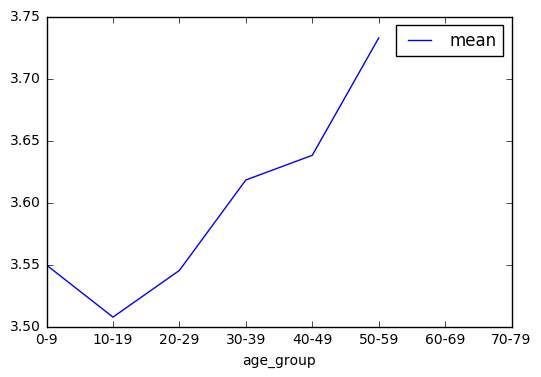

In [175]:
# 6. Some other statistic, figure, data aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.
age_and_rating = data.groupby('age_group').agg({'rating': [np.mean]})
age_and_mean_rating = age_and_rating['rating']
age_and_mean_rating

age_and_mean_rating.plot()
plt.show()

In [ ]:
# We can see from this plot that the average rating is increasing when the age is increasing despite 0-9 age group.
# It's reasonable that 0-9 age group will give high ratings because they are too young to make a fully advisable rating.
# We can draw the conclusion that young people have more strict standard than older people. 